In [ ]:
!pip install matplotlib
!pip install mpl_toolkits
    

 1 2 3
 4 5 1
 2 4 4
 1 2 5






4.69041575982343
22.0
3.0
8.0
2.449489742783178
5.999999999999999
2.0
4.0
2.0
4.0
2.0
2.0
4.69041575982343
22.0
3.0
8.0




3.7416573867739413
14.0
3.0
6.0
5.830951894845301
34.0
4.0
10.0
2.449489742783178
5.999999999999999
2.0
4.0
3.7416573867739413
14.0
3.0
6.0




2.449489742783178
5.999999999999999
2.0
4.0
2.0
4.0
2.0
2.0
5.830951894845301
34.0
4.0
10.0
2.449489742783178
5.999999999999999
2.0
4.0






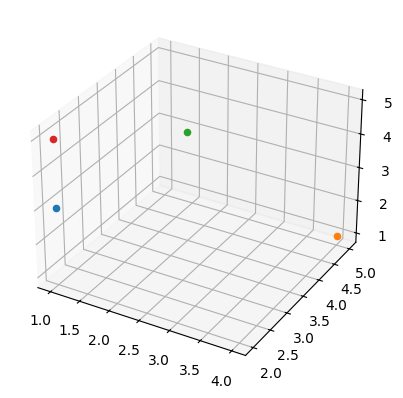

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax =fig.add_subplot(111, projection = '3d')
l = list()
for i in range(4):
    x, y, z = map(int, input().split(" "))
    l.append(np.array([x, y, z]))
    ax.scatter(x, y, z)
for k in l:
    for _ in range(4):
        print(np.linalg.norm(k - l[_]) if np.linalg.norm(k - l[_]) != 0 else '')
        print(np.linalg.norm(k - l[_]) ** 2 if np.linalg.norm(k - l[_]) ** 2 else '')
        print(np.linalg.norm(k - l[_], ord=np.inf) if np.linalg.norm(k - l[_], ord=np.inf) else '')
        print(np.linalg.norm(k - l[_], ord=1) if np.linalg.norm(k - l[_], ord=1) else '')
        

## Для предыдущего примера поэкспериментируйте с параметрами классификатора:
    1. Установите другое количество ближайших соседей (k = 1, 5, 10).
    2. Установите размер тестовой выборки 15% от всего датасета.
    3. Постройте графики и оцените качество моделей, проанализируйте результаты. Выведите матрицу ошибок, обоснуйте значение точности:

array([[6, 0, 0],
       [0, 9, 0],
       [0, 0, 8]])

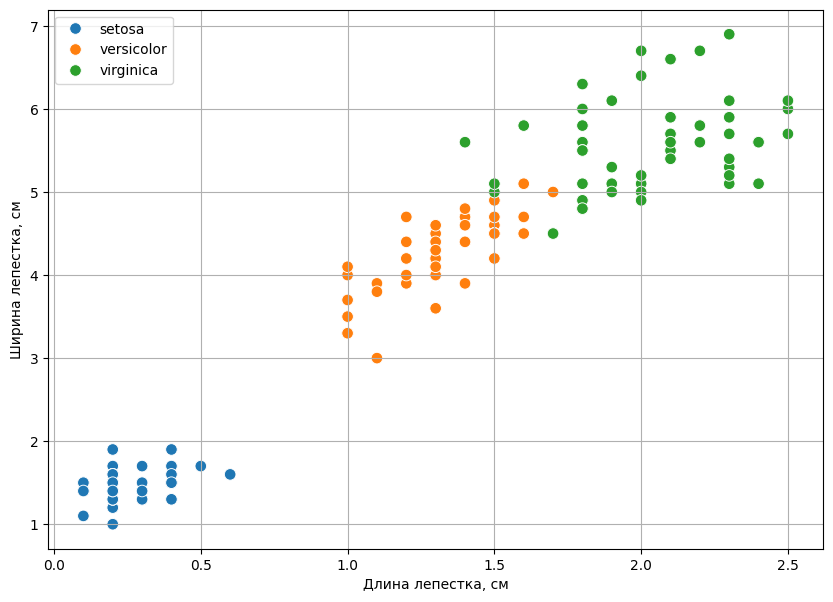

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
iris = sns.load_dataset('iris')
x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:,-1],
    test_size = 0.15)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y ='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()



model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred1[i]:
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)
        
cm1 = confusion_matrix(y_test, y_pred1)
ac1 = accuracy_score(y_test, y_pred1)
cm1


In [ ]:
!pip install seaborn

array([[6, 0, 0],
       [0, 8, 1],
       [0, 0, 8]])

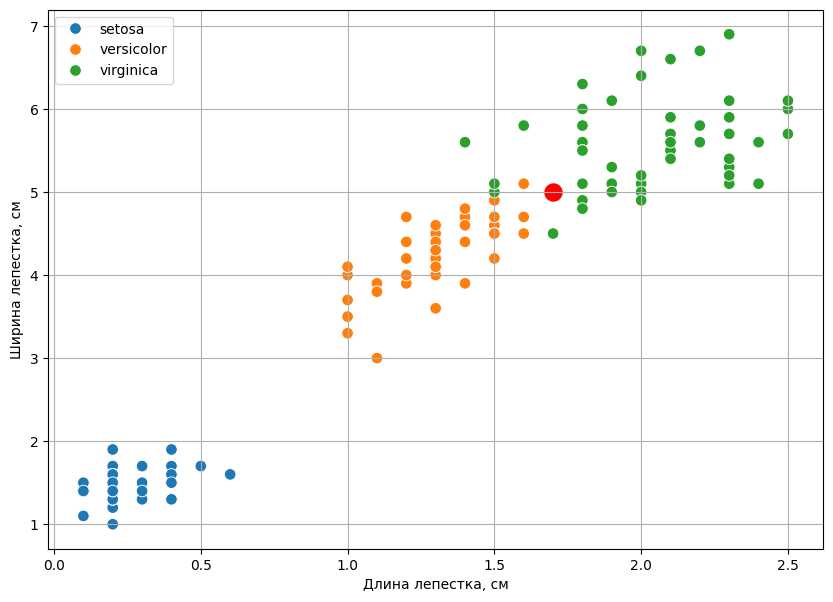

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y ='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()


model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred2[i]:
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)
        
cm2 = confusion_matrix(y_test, y_pred2)
ac2 = accuracy_score(y_test, y_pred2)
cm2        

array([[6, 0, 0],
       [0, 9, 0],
       [0, 1, 7]])

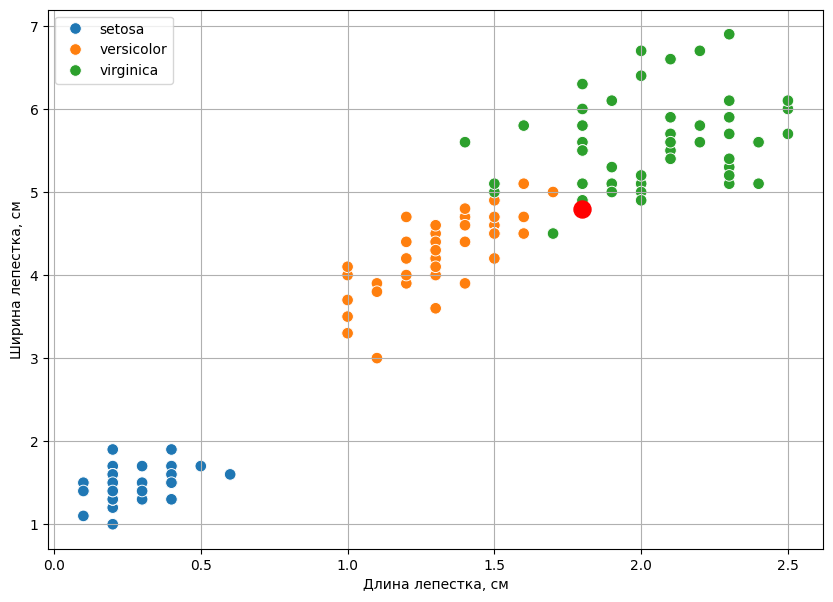

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y ='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()


model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred3[i]:
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)
        
cm3 = confusion_matrix(y_test, y_pred3)
ac3 = accuracy_score(y_test, y_pred3)
cm3

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({
    'имя': ['Антон', 'Артём', 'Аня', 'Алёна'],
    'возраст': [23, 18, 30, 36],
    'пол': ['муж', 'муж', 'жен', 'жен'],
    'доход': [344000, 180000, 156780, 99000],
    'цвет волос': ['черный', 'медный', 'блонд', 'русый'],
    'рост': [189, 180, 165, 170],
    'специальность': ['Разработчик', 'Инженер', 'Геолог', 'Кондитер'],
    'город работы': ['Санкт-Петребург', 'Москва', 'Тула', 'Москва']
}, index=[0, 1, 2, 3])

sex_code = {'муж': 1, 'жен': 0}
df['пол'] = df['пол'].replace(sex_code)
hair_code = {'черный': 0, 'медный': 1, 'блонд': 2, 'русый': 3, }
df['цвет волос'] = df['цвет волос'].replace(hair_code)

scaler = MinMaxScaler()

df[['возраст']] = scaler.fit_transform(df[['возраст']])
df[['доход']] = scaler.fit_transform(df[['возраст']])
df[['рост']] = scaler.fit_transform(df[['возраст']])

df = pd.get_dummies(df, columns=["специальность"])
df = pd.get_dummies(df, columns=["город работы"])

df.head()

C:\Users\Rav\AppData\Local\Temp\ipykernel_4508\874389213.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['пол'] = df['пол'].replace(sex_code)
C:\Users\Rav\AppData\Local\Temp\ipykernel_4508\874389213.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['цвет волос'] = df['цвет волос'].replace(hair_code)


,имя,возраст,пол,доход,цвет волос,рост,специальность_Геолог,специальность_Инженер,специальность_Кондитер,специальность_Разработчик,город работы_Москва,город работы_Санкт-Петребург,город работы_Тула
0,Антон,0.277778,1,0.277778,0,0.277778,False,False,False,True,False,True,False
1,Артём,0.000000,1,0.000000,1,0.000000,False,True,False,False,True,False,False
2,Аня,0.666667,0,0.666667,2,0.666667,True,False,False,False,False,False,True
3,Алёна,1.000000,0,1.000000,3,1.000000,False,False,True,False,True,False,False


In [46]:
knn = pd.read_csv('knn.csv')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

class_code = {'Underweight': 0, 'Normal': 1, 'Overweight': 2}
knn['Class'] = knn['Class'].replace(class_code)

# knn['Weight(x2)'] = preprocessing.MinMaxScaler(np.array(knn['Weight(x2)']))

# knn['Height(y2)'] = preprocessing.MinMaxScaler(np.array(knn['Height(y2)']))


x_train, x_test, y_train, y_test = train_test_split(
    knn.iloc[:, :-1],
    knn.iloc[:, -1],
    test_size = 0.20)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')
cm = confusion_matrix(y_test, y_pred)
print(f'prediction: {y_pred}')
print(f'confusion_matrix: \n{cm}')

accuracy: 0.8
prediction: [1 1 2 0 0]
confusion_matrix: 
[[1 0 0]
 [1 2 0]
 [0 0 1]]


C:\Users\Rav\AppData\Local\Temp\ipykernel_4508\3066076604.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  knn['Class'] = knn['Class'].replace(class_code)
